## Lecture: Music Information Retrieval

Christof Weiß, Computational Humanities group, JMU

# Exercise 3 - Audio Processing Basics

Material by Meinard Müller, Stefan Balke, and Frank Zalkow, AudioLabs Erlangen

In this exercise, we apply basic processing techniques using the Fourier transform and derive feature representations from audio recordings. The Fourier transform, which is used to convert a time-dependent signal
to a frequency-dependent signal, is one of the most important mathematical tools
in audio signal processing. Applying the Fourier transform to local sections
of an audio signal, one obtains the __short-time Fourier transform (STFT)__.
In this exercise, we study a discrete version of the STFT.
To work with the discrete STFT in practice, one needs to correctly
interpret the discrete time and frequency parameters.
We compute a discrete STFT and visualize its magnitude in form of a
__spectrogram representation__. Then, we derive from the STFT various audio features
that are useful for analyzing music signals.
In particular, we develop a __log-frequency spectrogram__, where the
frequency axis is converted into an axis corresponding to musical pitches.
From this, we derive a __chroma representation__, which is a useful tool
for capturing harmonic information of music.

### Preparation
Please download the zip file _Exercise_03_data.zip_ and unpack its content into the subfolder _/data/_ of this notebook's directory.

## <a name="Introduction"></a>  Introduction

Audio signals are complex mixtures consisting of a multitude of different sound components.
A first step in better understanding a given signal is to decompose it into building
blocks that are better accessible for the subsequent processing steps.
In the case that these building blocks consist of complex-valued sinusoidal
functions, such a process is also called __Fourier analysis__.
The Fourier transform maps a time-dependent signal
to a frequency-dependent function which reveals the spectrum of
frequency components that compose the original signal.
Loosely speaking, a signal and its Fourier transform are two sides
of the same coin.
On the one side, the signal displays the time information and hides the
information about frequencies.
On the other side, the Fourier transform reveals information about
frequencies and hides the time information.

To obtain back the hidden time information, Dennis Gabor introduced
in the year 1946 the modified Fourier transform, now known as
__short-time Fourier transform* (STFT)__.
This transform is a compromise between a time- and a frequency-based
representation by determining the sinusoidal magnitude
and phase content of local sections of a signal as it changes over time.
In this way, the STFT does not only tell which frequencies
are "contained" in the signal but also at which points of times or,
to be more precise, in which time intervals these frequencies appear.

<img src="./data/Feat_LogSpec_ChromaScale.png" width="66%" height="66%">

The figure shows various representations for a piano recording of the chromatic scale ranging from A0 ($p=21$) to C8 ($p=108$).
**(a)** Piano keys representing the chromatic scale.
**(b)** Spectrogram representation.
**(c)** Pitch-based log-frequency spectrogram.
**(d)** Chromagram representation.
For visualization purposes, the values are color-coded using a logarithmic scale.
The pitch C3 ($p=48$) played at time $t=30~{\mathrm{sec}}$ has been highlighted
by the rectangular frames.

The main objective of this exercise is to acquire a good understanding
of the STFT. To this end, we study a discrete version of the STFT
using the __discrete Fourier transform (DFT)__, which can be efficiently
computed using the fast Fourier transform (FFT).
The discrete STFT yields a discrete set of Fourier coefficients
that are indexed by time and frequency parameters.
The correct physical interpretation of these parameters
in terms of units such as seconds and Hertz
depends on the sampling rate, the window size, and the
hop size used in the STFT computation.
In this exercise, we will compute a discrete STFT using Python
and then visualize its magnitude by a spectrogram representation,
see [the STFT-section](#STFT).
By applying the STFT to different audio examples and
by modifying the various parameters, one should get a
better understanding on how the STFT works in practice.

To make music data comparable and algorithmically accessible,
the first step in basically all music processing tasks is to extract
suitable __features__ that capture relevant aspects
while suppressing irrelevant details.
In the second part of this lab course, we study audio features and
mid-level representations that are particularly useful for
capturing pitch information of music signals.
Assuming that we are dealing with music that is based on the __equal-tempered scale__
(the scale that corresponds to the keys of a piano keyboard),
we will convert an audio recording into a feature representation
that reveals the distribution of the signal's energy across the different
pitches, see [the  Log-Frequency-Spectrogram-section](#LFS).
Technically, these features are obtained from a spectrogram by converting
the linear frequency axis (measured in Hertz) into a logarithmic axis
(measured in (MIDI) pitch numbers).
From this log-frequency spectrogram, we then derive a __time-chroma representation__
by suitably combining pitch bands that correspond to the same pitch class (chroma),
see [the Chroma-Features-section](#Chroma).
The resulting chroma features show a high degree of robustness to
variations in timbre and instrumentation.

## <a name="STFT"></a>  STFT

The Fourier transform and in particular the discrete STFT serve as
*front-end transform*, the first computing step,
for deriving a large number of different musically relevant audio features, and as input representation for many deep-learning approaches.
We now recall the definition of the discrete STFT while fixing some notation.
Let $x:[0:L-1]:=\{0,1,\ldots,L-1\}\to{\mathbb R}$ be a real-valued discrete-time signal of length $L$ obtained by
equidistant sampling with respect to a fixed sampling rate $F_\mathrm{s}$ given in Hertz ($\mathrm{Hz}$).
Furthermore, let $w:[0:N-1]:=\{0,1,\ldots,N-1\}\to{\mathbb R}$ be a discrete-time window
of length $N\in{\mathbb N}$ (usually a power of two) and let $H\in{\mathbb N}$ be a hop size parameter.
With regards to these parameters, the discrete STFT ${\mathcal X}$ of the signal $x$ is given by

\begin{eqnarray}
   {\mathcal X}(m,k):= \sum_{n=0}^{N-1} x(n+mH)w(n)\exp(-2\pi ikn/N)
\end{eqnarray}

with $m\in[0:\lfloor \frac{L-N}{H} \rfloor]$ and $k\in[0:K]$. The complex number ${\mathcal X}(m,k)$ denotes
the $k^{\mathrm{th}}$ Fourier coefficient for the $m^{\mathrm{th}}$ time frame,
where $K=N/2$ is the frequency index corresponding to the Nyquist frequency.
Each Fourier coefficient ${\mathcal X}(m,k)$ is associated with the physical time position
(using the start position of the window as reference point)

\begin{equation}
         {T_{\mathrm{coef}}(m)} := \frac{m\cdot H}{F_\mathrm{s}}
 \end{equation}
 
 given in seconds (${\mathrm{sec}}$) and with the physical frequency
 
 \begin{equation}
         F_{\mathrm{coef}}(k) := \frac{k\cdot F_\mathrm{s}}{N}
\end{equation}

given in Hertz ($\mathrm{Hz}$).
For example, using $F_\mathrm{s}=44100~\mathrm{Hz}$ as for a CD recording,
a window length of $N=4096$, and a hop size of $H=N/2$,
we obtain a time resolution of $H/F_\mathrm{s}\approx 46.4~\mathrm{ms}$
and frequency resolution of $F_\mathrm{s}/N\approx 10.8~\mathrm{Hz}$.

In [2]:
import math
import os.path
from typing import List

import matplotlib.figure
## Please execute this cell for preparation
!pip install pysoundfile == 0.9.0.post1 librosa == 0.8.*

## 1.  STFT Parameters

### 1.1 STFT resolution

Compute the time and frequency resolution of the resulting STFT when using the following parameters of $F_\mathrm{s}$, $N$ and $H$. What are the Nyquist frequencies?


In [47]:
def T_coef(m, H, Fs):
    return (m * H) / Fs


def F_coef(k, N, Fs):
    ### your code here...
    return (k * Fs) / N


Fs, N, H = 22050, 1024, 512
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (
    Fs, N, H, T_coef(1, H, Fs) * 1000, F_coef(1, N, Fs), Fs / 2))
print(
    'Considered section length: N/Fs = 1024/22050 = 0.0464s. This is roughly double the amount of Tcoef since H is half the size of N.')
print('The first time frame is at 23.22ms')
print('\n')

Fs, N, H = 48000, 1024, 256
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (
    Fs, N, H, T_coef(1, H, Fs) * 1000, F_coef(1, N, Fs), Fs / 2))
print('The considered section is significantly shorter than in the first example. N/Fs = 1024/48000 Hz = 0.0213s')
print(
    'The time of the first time frame is significantly earlier than in the previous example since the hop size is smaller and the sampling rate is higher.')
print('The first Fourier Coefficient is higher since the sampling rate is higher and the considered length is smaller.')
print('\n')

Fs, N, H = 4000, 4096, 1024
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (
    Fs, N, H, T_coef(1, H, Fs) * 1000, F_coef(1, N, Fs), Fs / 2))

Fs = 22050, N = 1024, H =  512: Tcoef =  23.22 msec, Fcoef = 21.53 Hz, Nyquist = 11025.00 Hz
Considered section length: N/Fs = 1024/22050 = 0.0464s. This is roughly double the amount of Tcoef since H is half the size of N.
The first time frame is at 23.22ms


Fs = 48000, N = 1024, H =  256: Tcoef =   5.33 msec, Fcoef = 46.88 Hz, Nyquist = 24000.00 Hz
The considered section is significantly shorter than in the first example. N/Fs = 1024/48000 Hz = 0.0213s
The time of the first time frame is significantly earlier than in the previous example since the hop size is smaller and the sampling rate is higher.
The first Fourier Coefficient is higher since the sampling rate is higher and the considered length is smaller.


Fs =  4000, N = 4096, H = 1024: Tcoef = 256.00 msec, Fcoef =  0.98 Hz, Nyquist = 2000.00 Hz


### 1.2 Physical meaning

Using $F_\mathrm{s}=44100$, $N=2048$ and $H=1024$, what is the physical meaning of the Fourier coefficients
     ${\mathcal X}(1000,1000)$, ${\mathcal X}(17,0)$, and ${\mathcal X}(56,1024)$?

In [44]:
def ex1_2(Fs, N, H, k, m):
    ## your code here
    print("X:(%d, %d), Tcoef: %d, Fcoef: %d" % (m, k, T_coef(m, H, Fs), F_coef(k, N, Fs)))


Fs, N, H = 44100, 2048, 1024

m, k = 1000, 1000
ex1_2(Fs, N, H, k, m)
print(
    "This means that the fourier coefficient is at 23s and has the frequency of 21533 Hz. This Frequency is absolutely not hearable by a human.")
print('\n')

m, k = 17, 0
ex1_2(Fs, N, H, k, m)
print("Since there is no fourier coefficient index associated to this time frame, this has no physical meaning.")
print('\n')

m, k = 56, 1024
ex1_2(Fs, N, H, k, m)

X:(1000, 1000), Tcoef: 23, Fcoef: 21533
This means that the fourier coefficient is at 23s and has the frequency of 21533 Hz. This Frequency is absolutely not hearable by a human.


X:(17, 0), Tcoef: 0, Fcoef: 0
Since there is no fourier coefficient index associated to this time frame, this has no physical meaning.


X:(56, 1024), Tcoef: 1, Fcoef: 22050


The STFT is often visualized by means of a *spectrogram*,
which is a two-dimensional representation of the squared magnitude:

\begin{equation}
   {\mathcal Y}(m,k) = |{\mathcal X}(m,k)|^2.
\end{equation}

When generating an image of a spectrogram, the horizontal axis represents time,
the vertical axis is frequency, and the dimension indicating the spectrogram value
of a particular frequency at a particular time is represented by the intensity or
color in the image.

### 1.3 Load audio

Use the function <samp>librosa.load</samp> to read the file <samp>Sound_TwoSineTwoImpulse.wav</samp>.
  This defines a signal $x$ as well as the sampling rate $F_\mathrm{s}$.
  In the case that the signal is stereo, only use the first channel.

In [60]:
import librosa
from IPython.display import Audio

## your code here...
x, Fs = librosa.load("data/Sound_TwoSineTwoImpulse.wav")
length_in_seconds = len(x) / Fs

print("Length in sample: " + str(len(x)))
print("Length: " + str(length_in_seconds))
print("Sampling Rate: " + str(Fs) + " Hz")

Audio(x, rate=Fs)

Length in sample: 22050
Length: 1.0
Sampling Rate: 22050 Hz


## 2. Window function

### 2.1 Window size and hop size

Initialize a length parameter $N=4096$ and a hop size parameter $H=2048$.


In [96]:
"""
length
"""
N: int = 4096
"""
Hop size
"""
H: int = 2048

### 2.2 Hann window

Define a Hann window function $w$ of length $N$ (using <samp>scipy.signal.get_window</samp>).

In [7]:
from scipy import signal

omega = signal.windows.hann(N)

### 2.3 STFT computation

Compute ${\mathcal X}$ using the function <samp>librosa.stft</samp>.
      The resulting matrix contains the complex-valued Fourier coefficients ${\mathcal X}(m,k)$.



In [78]:
import numpy as np

# hann is the default window here
stft: np.ndarray = librosa.stft(y=x, hop_length=H, n_fft=N)
print('shape of the stft array: ' + str(stft.shape))
# 2049 = number of dimensions = number of frequency bins at a particular frame
# 22 = number of frames
print(str(stft))

shape of the stft array: (2049, 22)
[[ 8.2768497e+00+0.0000000e+00j  4.1377916e+00+0.0000000e+00j
  -5.2118412e-04+0.0000000e+00j ...  2.1373437e-04+0.0000000e+00j
  -1.0593039e+00+0.0000000e+00j -6.8623247e+00+0.0000000e+00j]
 [-8.2775850e+00-8.8817842e-16j  1.2134848e-03-4.1386147e+00j
  -5.2170502e-04+4.8952829e-06j ...  2.1395778e-04+3.3102440e-06j
  -7.8669596e-01-7.0967448e-01j  4.6002855e+00-5.0930471e+00j]
 [ 8.2822685e+00+0.0000000e+00j -4.1407804e+00-2.7227250e-03j
  -5.2327575e-04+9.8241198e-06j ...  2.1463404e-04+6.6230946e-06j
  -1.0886185e-01-1.0544538e+00j  6.9576526e-01+6.8312235e+00j]
 ...
 [-3.0644171e-02+0.0000000e+00j  1.5321158e-02-4.6127712e-05j
   1.4830787e-05-6.4805249e-06j ...  5.9837334e-06+1.3761297e-05j
  -3.6428764e-04+3.8433361e-03j  2.4876534e-03-2.4715193e-02j]
 [ 3.0601382e-02+8.8817842e-16j -1.1784606e-05-1.5296876e-02j
   6.2478125e-06-1.8091680e-06j ...  2.5304037e-06+3.8297626e-06j
  -2.8517274e-03+2.5904935e-03j  1.6695209e-02+1.8460460e-02j]
 [-3

### 2.4 Spectrogram computation

Compute the spectrogram ${\mathcal Y}(m,k)$.

The STFT is often visualized by means of a *spectrogram*,
which is a two-dimensional representation of the squared magnitude:

Die STFT ist oft als Spektrogram visualisiert, das eine zweidimensionale representation des quadrierten Betrags ist.

\begin{equation}
   {\mathcal Y}(m,k) = |{\mathcal X}(m,k)|^2.
\end{equation}

When generating an image of a spectrogram, the horizontal axis represents time,
the vertical axis is frequency, and the dimension indicating the spectrogram value
of a particular frequency at a particular time is represented by the intensity or
color in the image.


In [108]:
import numpy as np

# todo here compute the spectrogram as two dimensional representation

"""
I think the goal here is more to compute the general function, not the visualization
"""


def squared_magnitude(stft_value):
    return abs(stft_value)  # originally with *2, removed because of comparison with B_PythonVisualization.ipynb


spectrogram_calc = np.vectorize(squared_magnitude)
spectrogram = spectrogram_calc(stft)
print(str(spectrogram))

# assertion that the 'manual' computation above is equal to the automatic np computation (see B_PythonVisualization.ipynb)
assert np.all(np.abs(stft) == spectrogram)

[[8.2759447e+00 4.1386948e+00 1.0855723e-04 ... 6.5176631e-05
  2.7289507e-01 5.5811577e+00]
 [8.2760448e+00 4.1387935e+00 7.0190603e-05 ... 3.8147504e-05
  2.7287397e-01 5.5812025e+00]
 [8.2762814e+00 4.1388988e+00 8.6899890e-05 ... 4.9677565e-05
  2.7288276e-01 5.5813122e+00]
 ...
 [3.0582044e-02 1.5292387e-02 9.0908179e-07 ... 8.6102426e-07
  9.9280453e-04 2.0252889e-02]
 [3.0579979e-02 1.5292096e-02 5.6089675e-07 ... 6.8030471e-07
  9.9301967e-04 2.0253902e-02]
 [3.0579198e-02 1.5292650e-02 8.4876064e-07 ... 5.2465640e-07
  9.9297240e-04 2.0254714e-02]]


## 3. Physical interpretation

### 3.1 Physical time position

Compute the vector <samp>t</samp> containing the physical time positions (in seconds) of the time indices.

In [84]:
## your code here, compute t...
"""
# what are the time indices? - multiple options?
    * is time indices equal to time frame?
        - X(m, k): is the k-th Fourier Coefficient for the m-th time frame
        - we need just the number of time frames
        - because the time frames are not associated with a physical unit, just and ordering, we need to compute T_coef(m) for each time frame
        - then we have the 'time position in seconds' of the time indices m
"""

print(
    'This shows a tuple of the arrays dimensions. The first value shows the number of time frames, The last is the numer of Fourier Coefficients per time frame.')
print(str(stft.shape))
print(stft.shape[0])
print(stft.shape[1])

t = np.arange(stft.shape[1]) * H / Fs

print('This is the result of the time indices array: ' + str(len(t)))
print('The first 5 elements of the time indices array: ')
for i in range(0, 5):
    print(t[i])
print('The last 5 elements of the time indices array:')
for i in range(1, 6):
    print(t[len(t) - i])

print('\n')

# This should be the same as above (currently not correct)
t_librosa: np.ndarray = librosa.frames_to_time(np.arange(stft.shape[1]), sr=Fs, hop_length=H)
print('The first 5 elements of the librosa computed time indices array:')
for i in range(0, 5):
    print(t_librosa[i])
print('The last 5 elements of the librosa time computed indices array:')
for i in range(1, 6):
    print(t_librosa[len(t_librosa) - i])

assert np.all(t == t_librosa)

This shows a tuple of the arrays dimensions. The first value shows the number of time frames, The last is the numer of Fourier Coefficients per time frame.
(2049, 22)
2049
22
This is the result of the time indices array: 22
The first 5 elements of the time indices array: 
0.0
0.046439909297052155
0.09287981859410431
0.13931972789115646
0.18575963718820862
The last 5 elements of the time indices array:
0.9752380952380952
0.9287981859410431
0.8823582766439909
0.8359183673469388
0.7894784580498866


The first 5 elements of the librosa computed time indices array:
0.0
0.046439909297052155
0.09287981859410431
0.13931972789115646
0.18575963718820862
The last 5 elements of the librosa time computed indices array:
0.9752380952380952
0.9287981859410431
0.8823582766439909
0.8359183673469388
0.7894784580498866


### 3.2 Physical frequencies

Compute the vector <samp>f</samp> containing the frequency values (in Hertz) of the frequency indices.

In [107]:
### your code here, compute f...
"""
This computation should result in a two-dimensional array with the frequency values for each fourier coefficient.
The frequency indices are separated by the time frames.
"""

# f has the same shape as stft since the frequency values are also separated into time frames
# f: np.ndarray = np.empty(stft.shape)
#
# for m in np.nditer(stft):
#     frequencies_per_m: np.ndarray = np.empty(stft.shape[1], )
#     for k in np.nditer(m):
#         np.append(frequencies_per_m, F_coef(k, N, Fs))
#     np.append(f, frequencies_per_m)

# For (N/2+1) see definition of nyquist frequencies

def show_maxmin(np_arr: np.ndarray):
    print('max: ' + str(np.max(np_arr)))
    print('min: ' + str(np.min(np_arr)))

f: np.ndarray = np.arange(N / 2 + 1) * Fs / N
show_maxmin(f)


f_librosa: np.ndarray = librosa.fft_frequencies(Fs, N)
show_maxmin(f_librosa)

assert np.all(t == t_librosa)

max: 11025.0
min: 0.0
max: 11025.0
min: 0.0


/home/mpk/anaconda3/envs/FMP/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


AssertionError: 

### 3.3. Spectrogram visualization

Visualize the spectrogram in various ways
 with the axis given in form of indices.
 Use an appropriate figure size with the <samp>figsize</samp> keyword of <samp>plt.figure</samp>.
 For visualizing $\mathcal{Y}$, use the function <samp>plt.imshow</samp>.
      Explore its parameters
      <samp>aspect</samp>, <samp>origin</samp>, <samp>cmap</samp>.
      Furthermore, use the functions <samp>plt.colorbar()</samp>, <samp>plt.xlabel()</samp> and <samp>plt.ylabel()</samp>.
      Doing so, also get familiar with the various visualization parameters
      and tools offered by Python.

The spectrogram Y has 11026 frequency bins and 11 frames.


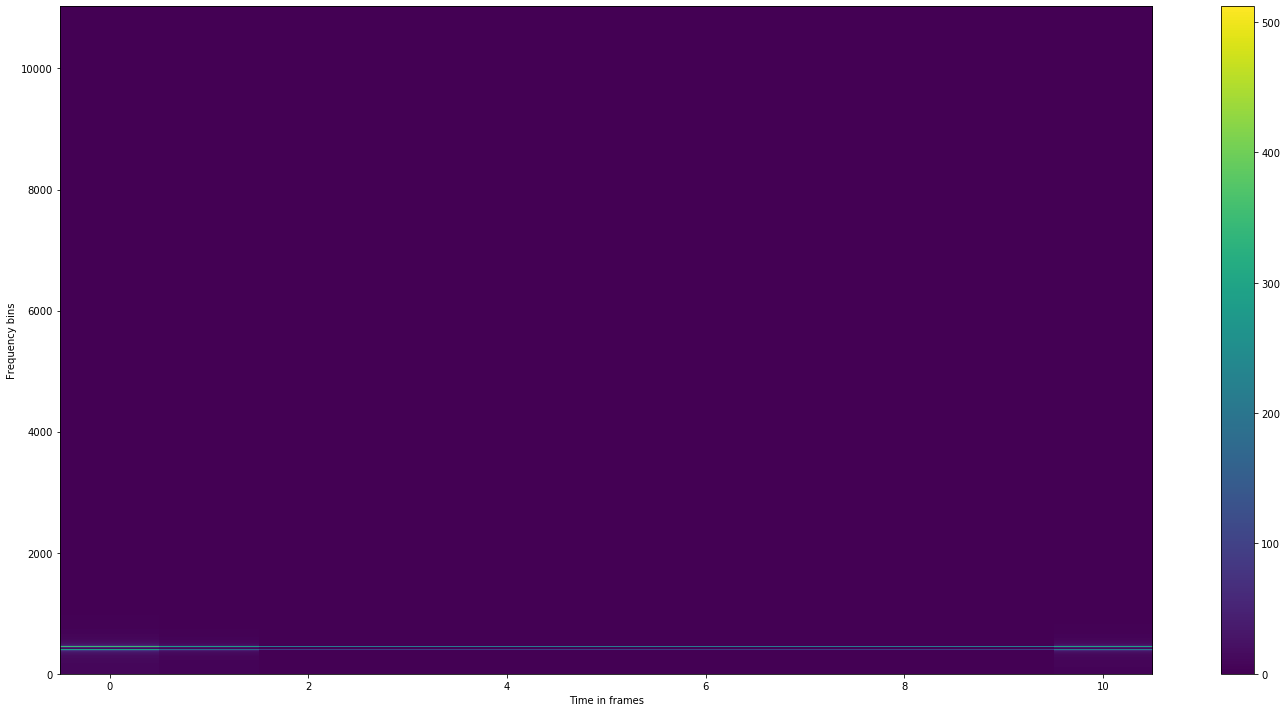

In [109]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline

## your code here...
"""
* axis given in form of indices?
* for Visualizing Y, use (...) plt.imshow
    - Y is the spectrogram
    - plt.imshow see below
    - parameters:
        # aspect = aspect ratio of the axes, options: auto and equal. equal (the default) ensures equal pixel aspect ratio, auto ensures that the data fits in the axes
        # origin = where to place the [0, 0], available options are 'upper' or 'lower'
        # cmap = colormap, viridis is the default
* additional functions plt.colorbar(), plt.xlabel(), plt.ylabel()
    - plt.colorbar()
    - plt.xlabel() -> sets the label on the x axis
    - plt.ylabel() -> sets the label on the y axis
"""

print('The spectrogram Y has %d frequency bins and %d frames.' % (spectrogram.shape[0], spectrogram.shape[1]))
fig: figure = plt.figure(figsize=(20, 10))
plt.imshow(spectrogram, cmap='viridis', aspect='auto', origin='lower')
plt.xlabel('Time in frames')
plt.ylabel('Frequency bins')
plt.colorbar()  # shows the right intensity colorbar
plt.tight_layout()  # matches the layout of the figure to the available screen estate

### 3.4 Physical axes

Plot the spectrogram with the axis given in seconds and Hertz. This should be done with the <samp>extent</samp> keyword, using <samp>t</samp> and <samp>f</samp>. Furthermore, do only visualize the lowest 2 kHz by using <samp>plt.ylim</samp>.

Time range (seconds): [ 0.00,  0.98]; frequency range (Hertz): [ 0.00, 2048.00]


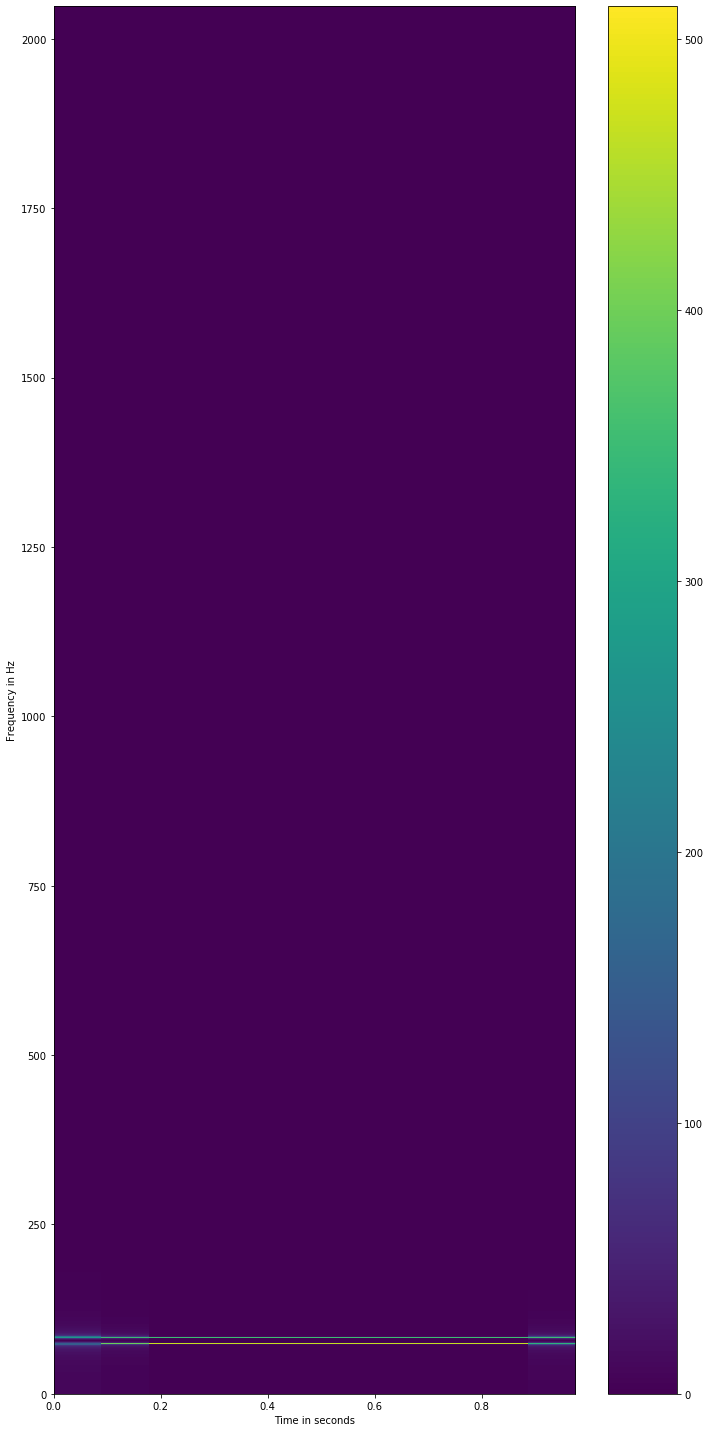

In [99]:
## your code here...
"""
x-Axis: seconds
y-Axis: hertz
From the matplotlib documentation:
    The extent keyword argument controls the bounding box in data coordinates that the image will fill, specified as (left, right, bottom, top) in data coordinates.
    The default of extent is None
"""

left = t_librosa[0]
right = t_librosa[-1]
lower = np.argmin(f_librosa)
upper = np.argmax(f_librosa)

print('Time range (seconds): [%5.2f, %5.2f]; frequency range (Hertz): [%5.2f, %5.2f]'
      % (left, right, lower, upper))

fig = plt.figure(figsize=(10, 20))
plt.imshow(spectrogram, cmap='viridis', aspect='auto', origin='lower', extent=[left, right, lower, upper])
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
plt.colorbar()
plt.tight_layout()


### 3.5 Decibel scale

Next, use a logarithmic decibel-scale for visualizing the values ${\mathcal Y}(m,k)$. (Recall that, given a value
      $v \in {\mathbb R}$, the decibel value is $10 \log_{10}(v)$.)

Time range (seconds): [ 0.00,  0.98]; frequency range (Hertz): [ 0.00, 21.00]


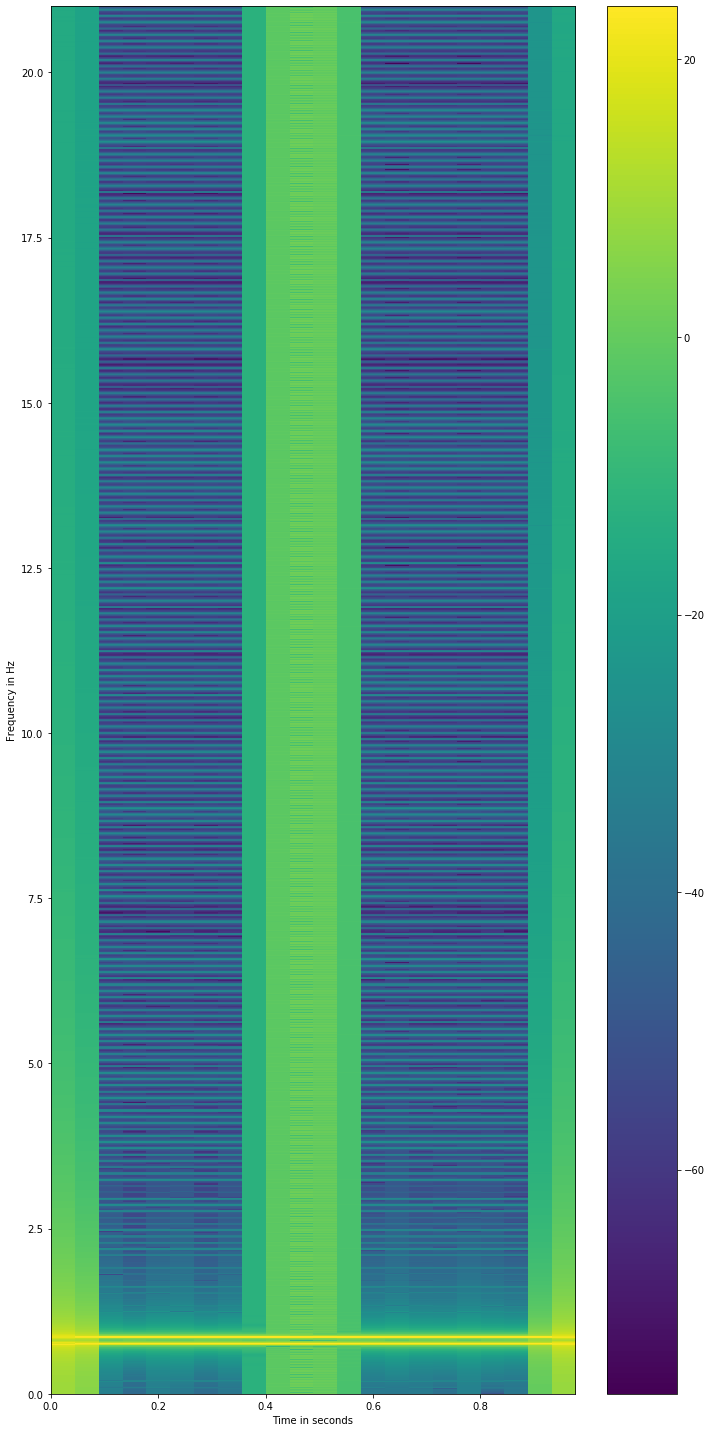

In [87]:
## your code here...
left = t_librosa[0]
right = t_librosa[-1]
lower = np.argmin(f_librosa)
upper = np.argmax(f_librosa)

print('Time range (seconds): [%5.2f, %5.2f]; frequency range (Hertz): [%5.2f, %5.2f]'
      % (left, right, lower, upper))

fig = plt.figure(figsize=(10, 20))
plt.imshow(10 * np.log10(spectrogram), cmap='viridis', aspect='auto', origin='lower',
           extent=[left, right, lower, upper])
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
plt.colorbar()
plt.tight_layout()

### 3.6 Influence of window and hop size

Compute spectrograms using different window sizes
      (for example, $N\in\{256,1024,4096,8192\}$) and
      different hop sizes (for example, $H\in\{1,N/4,N/2\}$) in the various combinations.
      Do only visualize the lowest 2 kHz.
      Discuss the trade-off between time resolution and frequency resolution.

General Explanation:
N describes

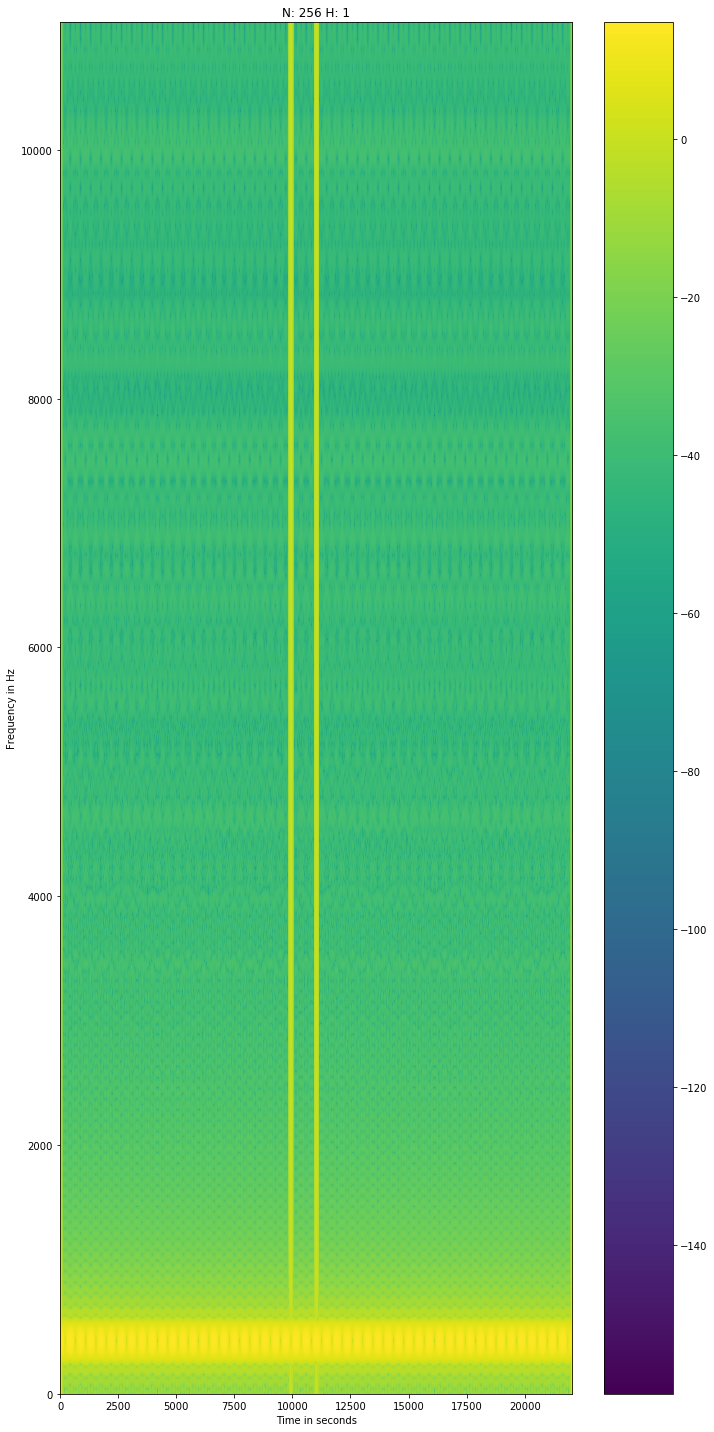

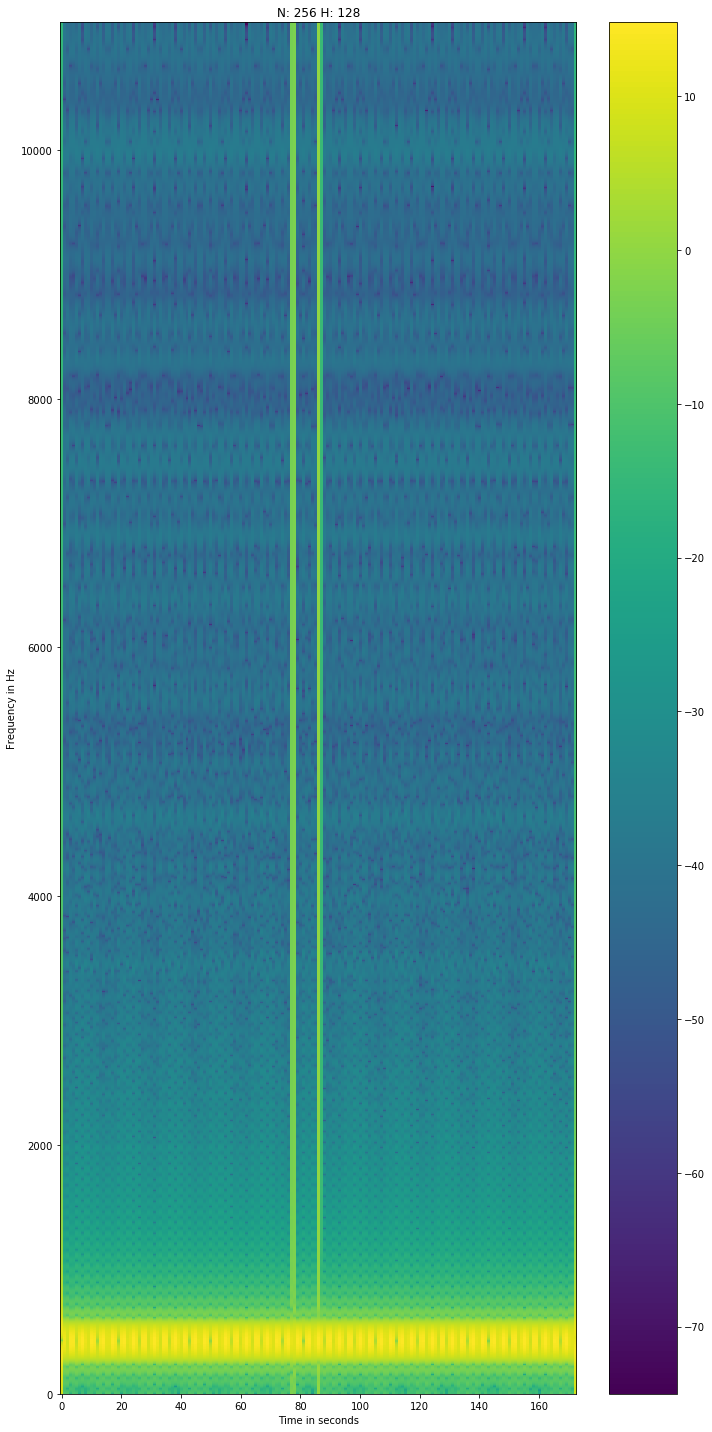

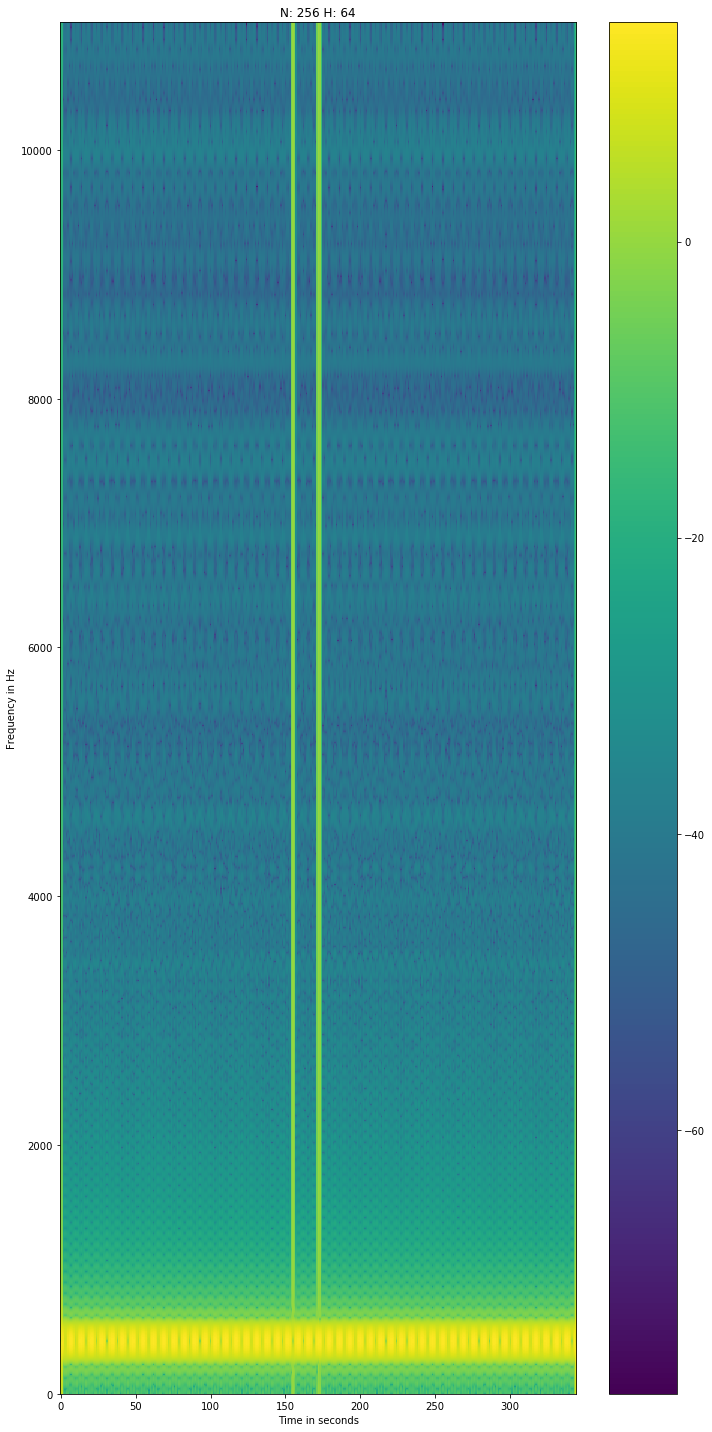

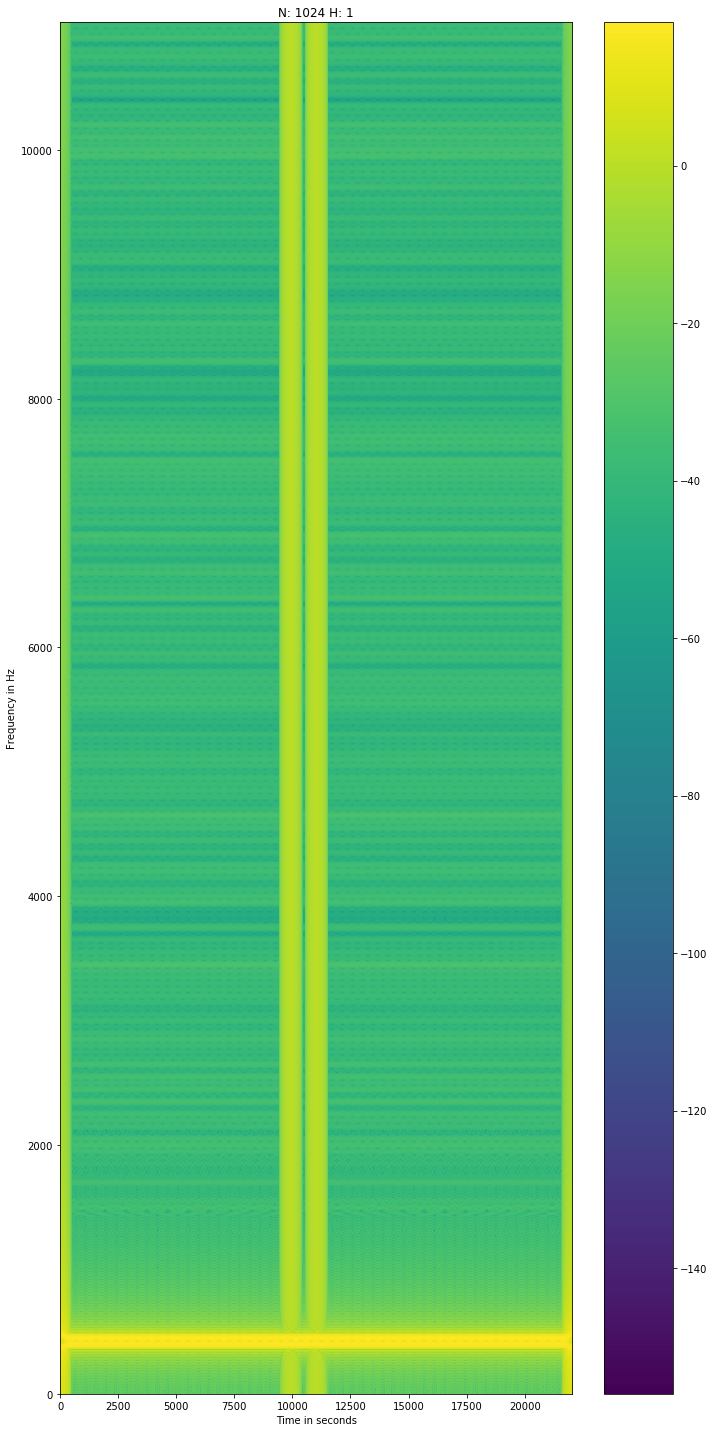

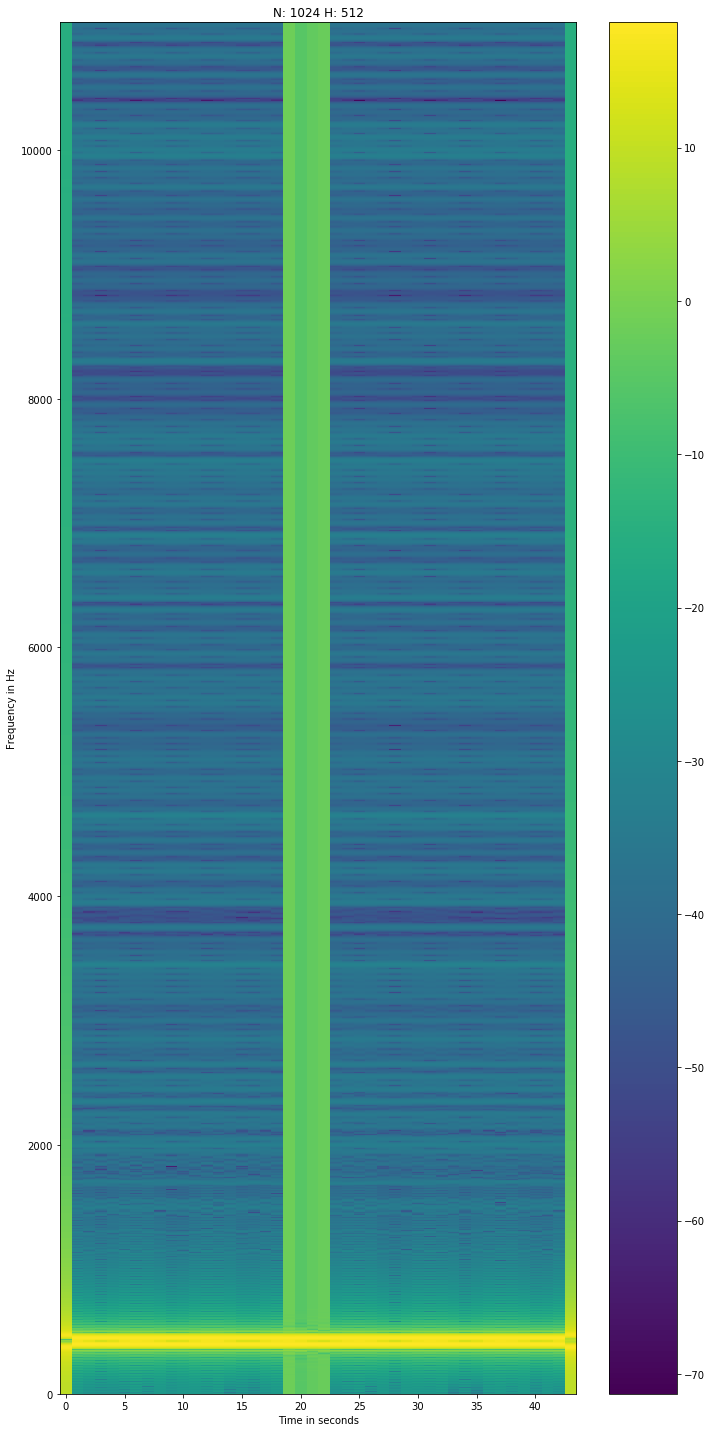

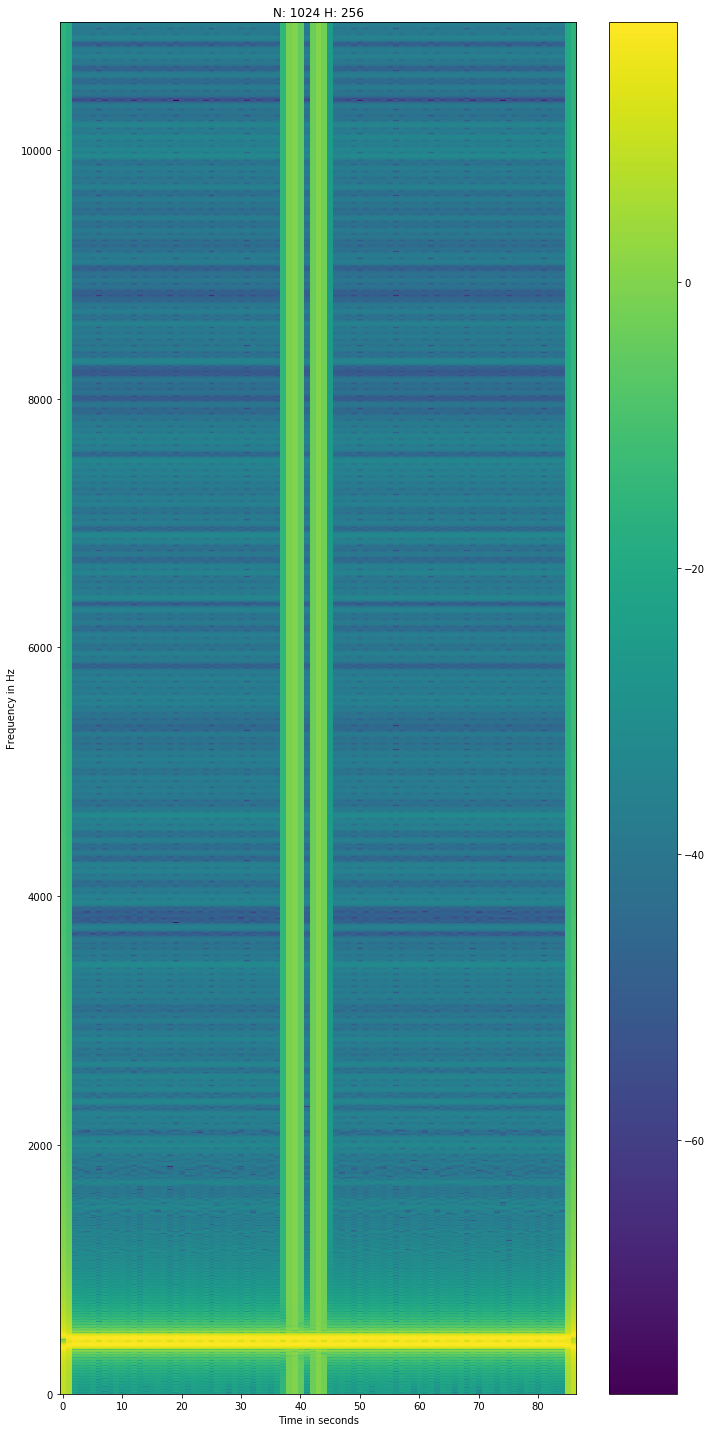

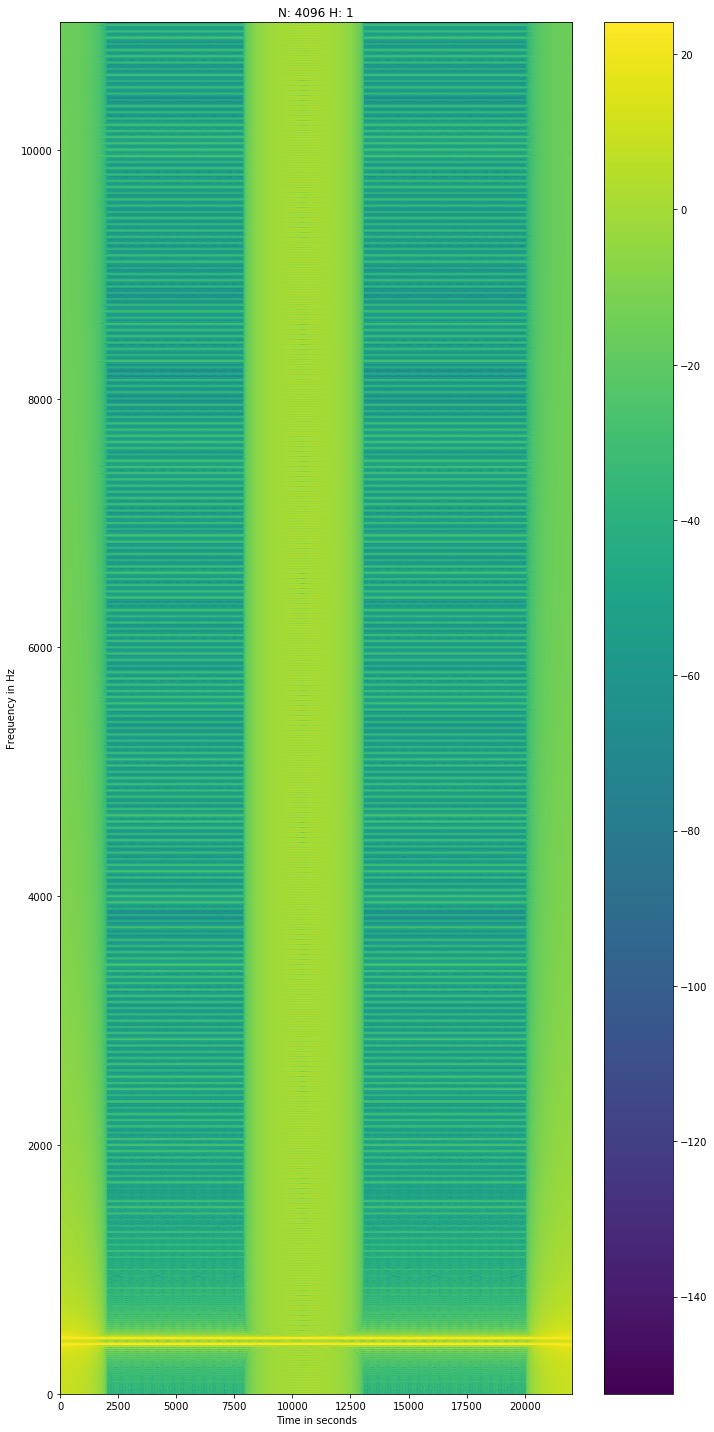

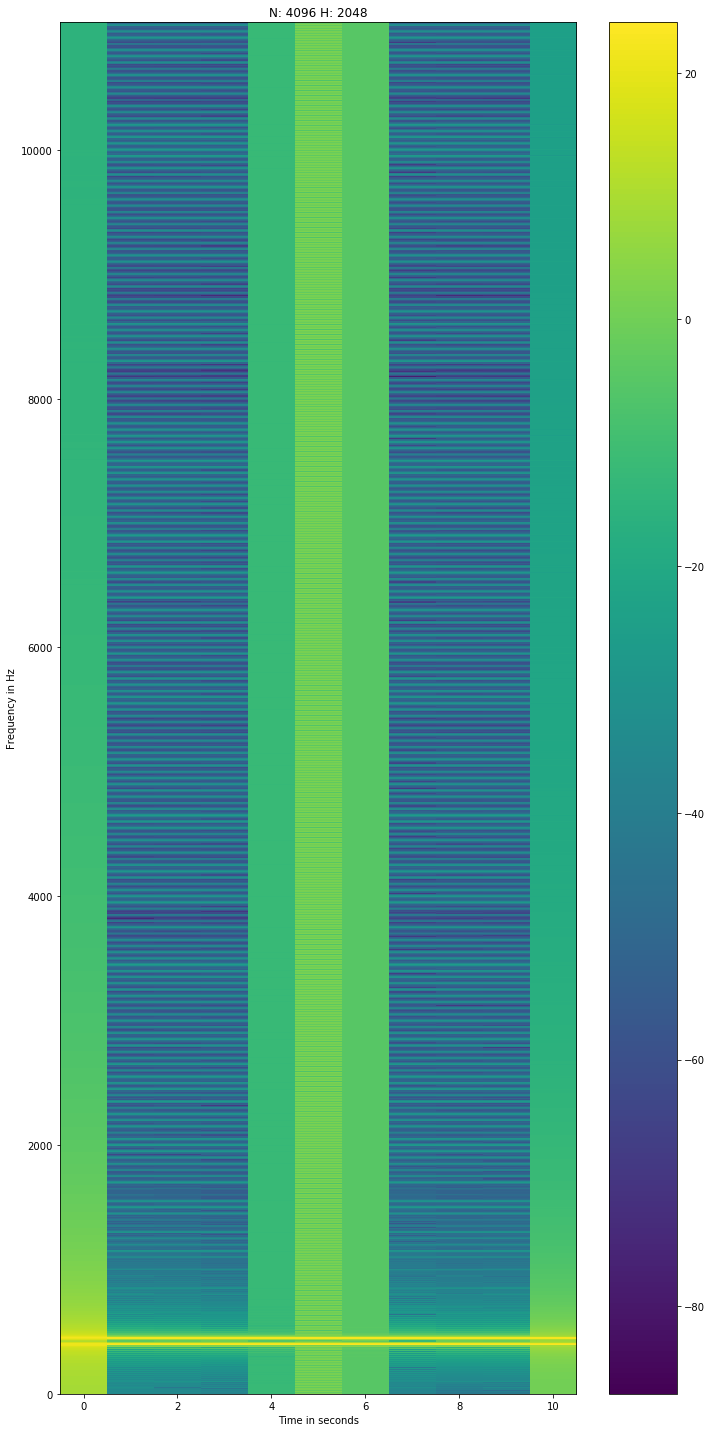

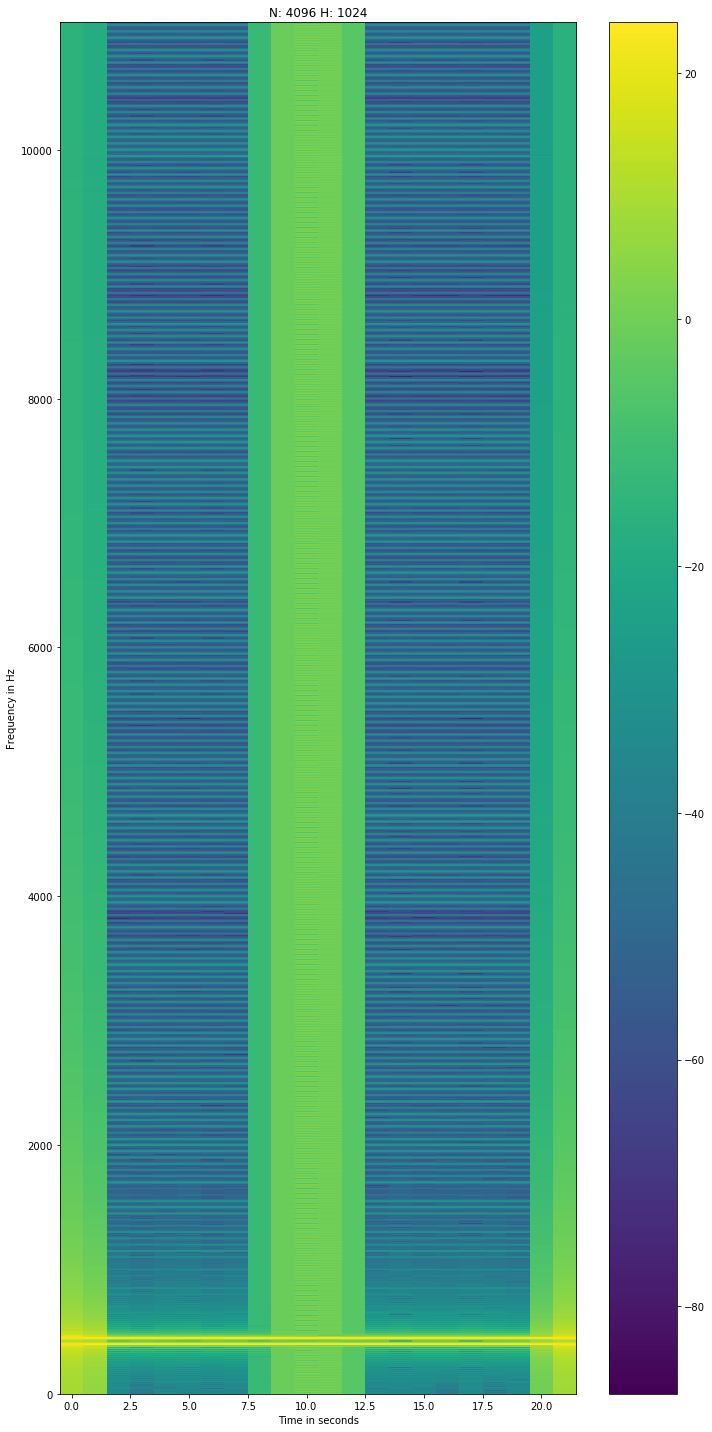

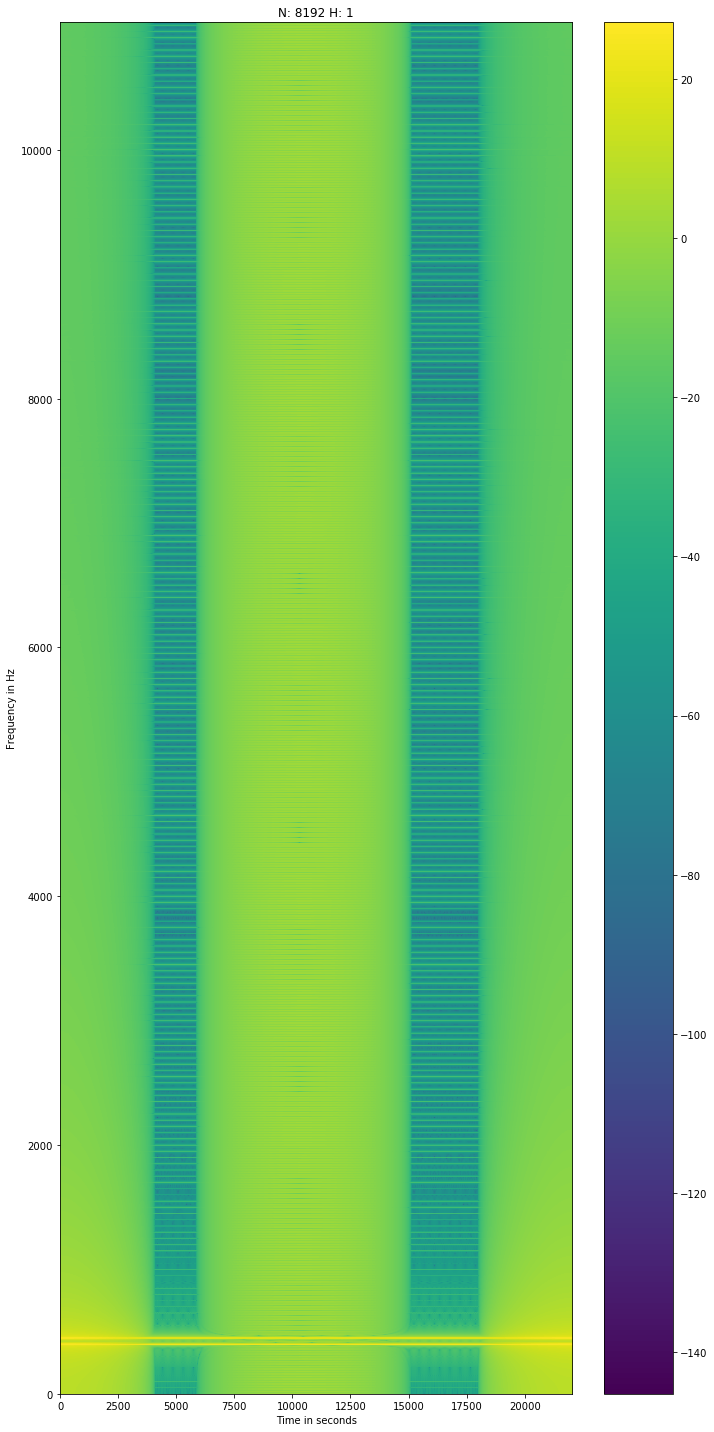

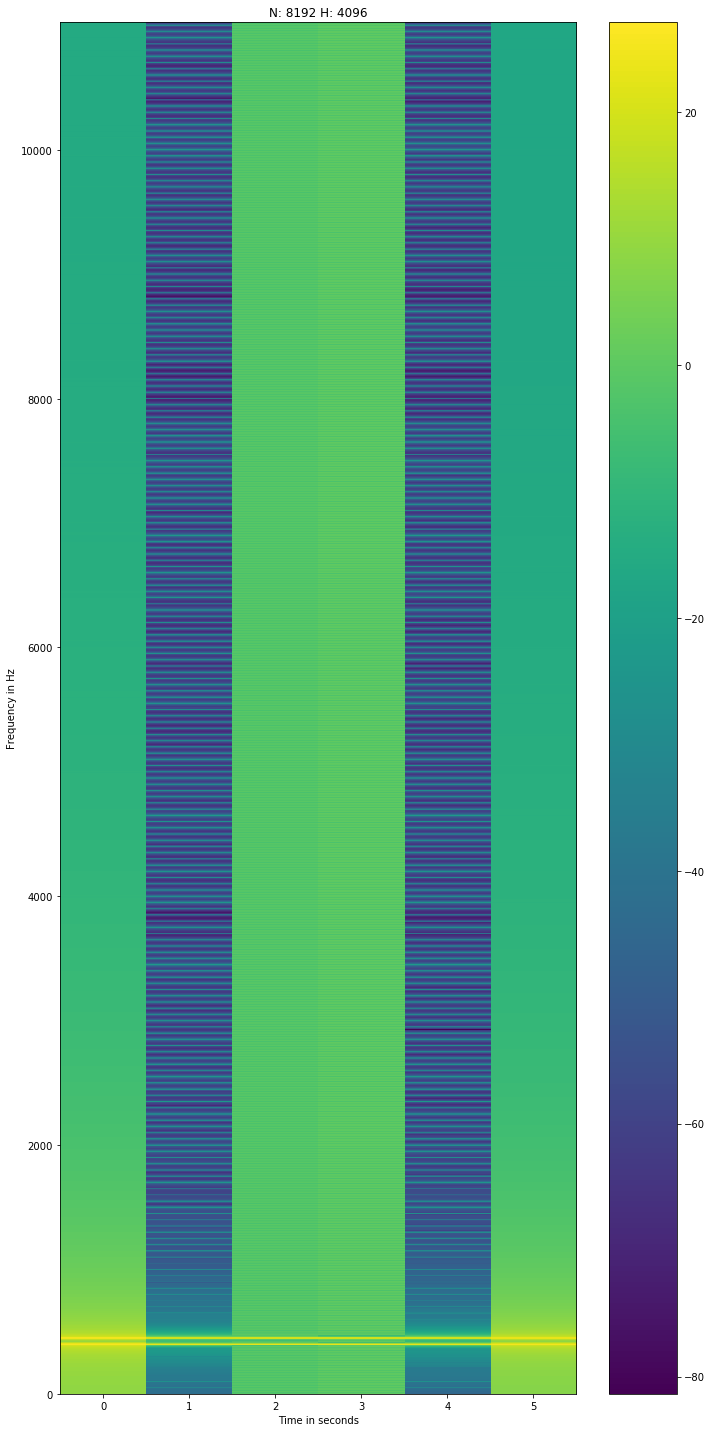

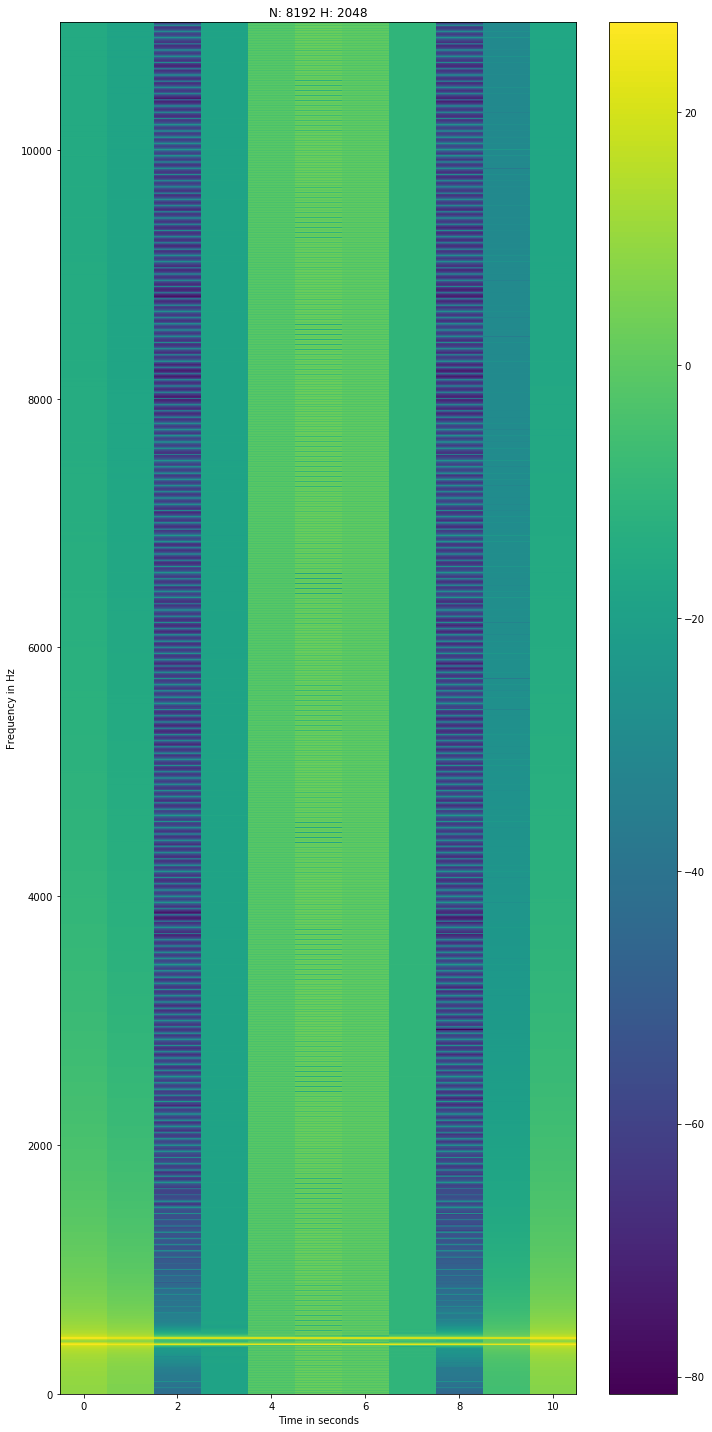

In [88]:
from typing import List
from matplotlib.axes import Axes
import matplotlib

"""
open questions:
    * how do I only visualize the loest 2kHz?

Todo Tradeoff between time resoltion and frequency resolution?

Issues:
    * The x-bar schows a different timestep when using hop size = 1
"""

## your code here...
N: List[int] = [256, 1024, 4096, 8192]

descriptions: List[str] = [
    "Here, the Hop Size is 1. This means that the Fourier Coefficients have the maximum possible time resolution.\n Each Sample in the input is analyzed individually without any overlap.\nThe frequency resolution is not sufficient. Each Window has only one sample for analysis.",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12"
]

description_counter: int = 0

for window_length in N:
    omega = signal.windows.hann(window_length)

    for hop_length_divisor in [window_length, 2, 4]:
        stft = librosa.stft(x, window=omega, win_length=window_length,
                            hop_length=int(window_length / hop_length_divisor), n_fft=Fs)
        spectrogram = np.abs(stft)

        t = librosa.samples_to_time(np.arange(stft.shape[0]), sr=Fs)
        f = librosa.frames_to_time(np.arange(stft.shape[1]), sr=Fs, hop_length=int(window_length / hop_length_divisor))

        fig: matplotlib.figure.Figure = plt.figure(figsize=(10, 20))

        ax: Axes = fig.add_subplot()
        ax.set_title('N: ' + str(window_length) + ' H: ' + str(int(window_length / hop_length_divisor)))
        # ax.text(0.5, -0.1, descriptions[description_counter], ha='center', fontsize=20)
        ax.text(0.5, -0.1, '', transform=ax.transAxes, ha='center', fontsize=20)
        description_counter += 1

        plt.imshow(10 * np.log10(spectrogram), cmap='viridis', aspect='auto', origin='lower')
        plt.xlabel('Time in seconds')
        plt.ylabel('Frequency in Hz')
        plt.colorbar()
        plt.tight_layout()



## 4. Logarithmic compression

The human sensation of the intensity of a sound is logarithmic in nature.
In practice, sounds that have an extremely small intensity may still be
relevant for human listeners.
Therefore, one often uses a decibel scale, which  is a logarithmic unit expressing
the ratio between two values.
As an alternative to using a decibel scale, one often applies in audio processing
a step also referred to as __logarithmic compression__,
which works as follows. Let $\gamma\in{\mathbb R}_{>0}$ be a positive constant
and $\Gamma_\gamma:{\mathbb R}_{>0} \to {\mathbb R}_{>0}$ a function defined by

\begin{equation}
   \Gamma_\gamma(v):=\log(1+ \gamma \cdot v).
\end{equation}

for $v\in{\mathbb R}_{>0}$, where we use the natural logarithm.
Note that the function $\Gamma_\gamma$ yields a positive
value $\Gamma_\gamma(v)$ for any positive value $v\in{\mathbb R}_{>0}$.
Now, for a representation with positive values such as a spectrogram,
one obtains a compressed version by applying the function $\Gamma_\gamma$
to each of the values:

\begin{equation}
   (\Gamma_\gamma\circ {\mathcal Y})(m,k):=\log(1+ \gamma \cdot {\mathcal Y}(m,k)).
\end{equation}

Why is this operation called *compression* and what is the role of
the constant $\gamma$? The problem with representations such as a spectrogram
is that its values possess a large dynamic range. As a result,
small, but still relevant values may be dominated by large values.
Therefore, the idea of compression is to balance out this discrepancy
by reducing the difference between large and small values with
the effect to enhance the small values.
This exactly is done by the function $\Gamma_\gamma$, where the degree of compression
can be adjusted by the constant $\gamma$. The larger $\gamma$,
the larger the resulting compression.

### 4.1 Spectrogram of a piano tone

Use the file <samp>Tone_C4_Piano.wav</samp> to define a signal $x$. Compute the STFT and the spectrogram ${\mathcal Y}$ as above using a Hann window
    of size $N=4096$ and a hop size $H=2048$.

In [ ]:
## your code here...

### 4.2 Compressed spectrogram

Compute the compressed version $\Gamma_\gamma\circ {\mathcal Y}$ of the spectrogram using different constants $\gamma\in\{1,10,100,1000,10000\}$.
Visualize the original spectrogram and its compressed versions.
What do you see? Discuss the results.

In [ ]:
## your code here...

## <a name="LFS"></a> 5. Log-Frequency Spectrogram

We now derive some audio features from the STFT by converting the
frequency axis (given in Hertz) into an axis that corresponds to musical pitches.
In Western music, the __equal-tempered scale__ is often used today,
where the pitches of the scale correspond to the keys of a piano keyboard.
In this scale, each octave (the interval between two tones, whose fundamental frequencies differ by a factor of two) is split up into twelve equal logarithmically spaced units.
In MIDI notation, one considers $128$ pitches, which are serially
numbered starting with $0$ and ending with $127$.
The  MIDI pitch $p=69$ corresponds to the pitch $\mathrm{A4}$
(having a center frequency of $440~\mathrm{Hz}$), which is often used as standard
for tuning musical instruments.
In general, the center frequency $F_{\mathrm{pitch}}(p)$ of a pitch $p\in[0:127]$ is
given by the formula

\begin{equation}
F_{\mathrm{pitch}}(p) = 2^{(p-69)/12} \cdot 440 ~ \mathrm{Hz}.
\end{equation}

The logarithmic perception of frequency motivates the use of a time-frequency
representation with a logarithmic frequency axis labeled by the pitches of
the equal-tempered scale.
To derive such a representation from a given spectrogram representation,
the basic idea is to assign each spectral coefficient ${\mathcal X}(m,k)$ to the pitch
with center frequency that is closest to the frequency $F_{\mathrm{coef}}(k)$.
More precisely, we define for each pitch $p\in[0:127]$ the set

\begin{equation}
    P(p) := \{k\in[0:K]:F_{\mathrm{pitch}}(p - 0.5) \leq   F_{\mathrm{coef}}(k) <  F_{\mathrm{pitch}}(p + 0.5)\}.
\end{equation}

From this, we obtain a log-frequency spectrogram
${\mathcal Y}_\mathrm{LF}:{\mathbb Z}\times [0:127]\to{\mathbb R}_{\geq 0}$ defined by

\begin{equation}
      {\mathcal Y}_\mathrm{LF}(m,p) := \sum_{k \in P(p)}{|{\mathcal X}(m,k)|^2}.
\end{equation}

By this definition, the frequency axis is partitioned logarithmically and
labeled linearly according to MIDI pitches.

### 5.1 Center frequencies

Compute the center frequencies $F_{\mathrm{pitch}}(p)$ for $p=68$, $p=69$, and $p=70$.

In [ ]:
def F_pitch(p):


## your code here...

print('Fpitch(%d) = %.2f Hz' % (68, F_pitch(68)))
print('Fpitch(%d) = %.2f Hz' % (69, F_pitch(69)))
print('Fpitch(%d) = %.2f Hz' % (70, F_pitch(70)))

### 5.2 Cutoff frequencies

Compute the cutoff frequencies $F_{\mathrm{pitch}}(p - 0.5)$ and $F_{\mathrm{pitch}}(p + 0.5)$
           of the frequency band corresponding to pitch $p=69$.

In [ ]:
## your code here...

### 5.3 Frequency index assignment

Using $F_\mathrm{s}=22050$ and $N=4096$, determine the set $P(p) \subseteq [0:K]$ for $p=69$,  $p=57$, $p=45$, and $p=33$.

In [ ]:
def P(p, Fs, N):


## your code here...

Fs, N = 22050, 4096
print('P(%d) = %s' % (69, P(69, Fs, N)))
print('P(%d) = %s' % (57, P(57, Fs, N)))
print('P(%d) = %s' % (45, P(45, Fs, N)))
print('P(%d) = %s' % (33, P(33, Fs, N)))

### 5.4 Interpretation
Please explain with your own words why the definition of
           ${\mathcal Y}_\mathrm{LF}(m,p)$ may be
           problematic for small values of pitch $p$? How is the size of the
           set $P(p)$ influenced? Support your answer with a brief example.

In [ ]:
## your code here...

## 6. Pitch and chroma features

Use the file <samp>Scale_Cmajor_Piano.wav</samp> to define a signal $x$.

In [ ]:
## your code here...

Audio(x, rate=Fs)

### 6.1 Spectrogram of the C major scale

Compute the STFT and the spectrogram as above using a Hann window
    of size $N=4096$ and a hop size $H=2048$.
    In the following you also need the information contained in the frequency vector <samp>f</samp>.

In [ ]:
# your code here...

### 6.2 Log-frequency spectrogram

Compute the log-frequency spectrogram  ${\mathcal Y}_\mathrm{LF}$. Visualize the log-frequency spectrogram with the axes given in seconds and MIDI pitch, respectively. Use log-compression to enhance the visualization.

In [ ]:
def compute_Y_lf(Y, Fs, N):


# your code here...

Y_lf = compute_Y_lf(Y, Fs, N)

# your code here...
Y_lf_compr =

plt.figure(figsize=(16.0, 5.33))
img = plt.imshow(Y_lf_compr, aspect='auto', origin='lower', cmap='gray_r', extent=[min(t), max(t), 0, 127])
cbar = plt.colorbar()
xlbl = plt.xlabel('Time (seconds)')
ylbl = plt.ylabel('Frequency (MIDI-Pitch)')

### <a name="Chroma"></a> 6.3 Chroma-Features

The human perception of pitch is periodic in the sense that two pitches are
perceived as similar in *color* (i.e., play a similar harmonic role) if they
differ by one or several __octaves__ (where, in our scale, an octave is defined as the distance of $12$ pitches corresponding to a doubling of frequency).
For example, the pitches $p=60$ and $p=72$ are one octave apart, and the pitches
$p=57$ and $p=81$ are two octaves apart.
A pitch can be separated into two components,
which are referred to as __tone height__ and __chroma__ 
The tone height refers to the octave number and the chroma (or pitch class) to the respective pitch spelling attribute.
In Western music notation, the $12$ pitch attributes are given by the
set $\{\mathrm{C},\mathrm{C}^{\sharp},\mathrm{D},\ldots,\mathrm{B}\}$.
Enumerating the chroma values, we identify this set with $[0:11]$
where $c=0$ refers to chroma $\mathrm{C}$, $c=1$ to $\mathrm{C}^{\sharp}$, and so on.

The main idea of __chroma features__ is to aggregate all
spectral information that relates to a given pitch class into a single coefficient.
Given a pitch-based log-frequency spectrogram
${\mathcal Y}_\mathrm{LF}:{\mathbb Z}\times[0:127]\to {\mathbb R}_{\geq 0}$,
a chroma representation or __chromagram__
${\mathbb Z}\times[0:11]\to {\mathbb R}_{\geq 0}$ can be derived
by summing up all pitch coefficients that belong to the same chroma:

\begin{equation}
      {\mathcal C}(m,c) := \sum_{\{p \in [0:127]\,|\,p\,\mathrm{mod}\,12 = c\}}{{\mathcal Y}_\mathrm{LF}(m,p)}
\end{equation}
for $c\in[0:11]$.

Derive the chroma representation ${\mathcal C}$ from the log-frequency spectrogram
      as computed in the last exercise.

In [ ]:
def compute_C(Y_lf):

## your code here...

### 6.4 Chroma visualization

Visualize the chroma representation with the axes given in seconds and
      chroma indices, respectively. Try to explain what you see in the chroma visualization.

In [ ]:
## your code here...

Also play around with different parameter settings for $N$ and $H$
      and try out some other audio files.

In [ ]:
## your code here...

<h4>Reference</h4>
<br/>

<div>
  <a href="http://www.springer.com/gp/book/9783319219448">
    <img src="./data/FMP_Cover.png" alt="FMP_Cover" width="80"  style="float:right;">
  </a>
</div>

<div style="float:left;">
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> <br /> 
Fundamentals of Music Processing &ndash; Audio, Analysis, Algorithms, Applications  <br />
ISBN: 978-3-319-21944-8<br />
483 p., <a href="http://www.springer.com/gp/book/9783319219448">Springer</a>, 2015  <br /> 
<a href="http://www.music-processing.de">www.music-processing.de</a>    <br /> 
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP">Accompanying Website</a>   
</div>

<h4>Acknowledgment</h4>
<br/>
The International Audio Laboratories Erlangen are a joint institution of the Friedrich-Alexander-Universität Erlangen-Nürnberg (FAU) and Fraunhofer Institute for Integrated Circuits IIS. 